In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
GU_D = pd.read_csv('/content/drive/MyDrive/FOREX/trademade_GBP_USD.csv')
GU_D.rename(columns={'date':'Date','open':'Open','high':'High','low':'Low','close':'Close'}, inplace=True)

In [ ]:
GU_D['Date'] = pd.to_datetime(GU_D['Date'])

In [ ]:
df_new = GU_D.drop('Unnamed: 0', axis=1)

In [ ]:
df_new['Candle'] = df_new['Close']- df_new['Open']
df_new['PIPS'] = df_new['Candle']*10000

In [ ]:
df_new.head()

,Date,Open,High,Low,Close,Candle,PIPS
0,2010-06-15,1.4745,1.4834,1.4690,1.4807,0.0062,62.0
1,2010-06-16,1.4806,1.4851,1.4729,1.4730,-0.0076,-76.0
2,2010-06-17,1.4728,1.4836,1.4648,1.4822,0.0094,94.0
3,2010-06-18,1.4822,1.4883,1.4775,1.4825,0.0003,3.0
4,2010-06-21,1.4860,1.4932,1.4740,1.4758,-0.0102,-102.0


In [ ]:
df_new.describe()

,Open,High,Low,Close,Candle,PIPS
count,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000
mean,1.450181,1.455909,1.444341,1.450199,0.000018,0.180286
std,0.146171,0.145962,0.146322,0.146156,0.007753,77.532202
min,1.148680,1.171540,1.141180,1.148680,-0.119020,-1190.200000
25%,1.305170,1.311300,1.300515,1.305090,-0.004345,-43.450000
50%,1.481520,1.487350,1.472640,1.481500,-0.000020,-0.200000
75%,1.580100,1.586150,1.573350,1.580300,0.004500,45.000000
max,1.716580,1.719220,1.714000,1.716570,0.035220,352.200000


In [ ]:
abs(df_new['PIPS']).mean()

56.600835945663626

In [ ]:
!pip install ta
!pip install pandas_ta

In [ ]:
from ta.trend import PSARIndicator 
from ta.momentum import RSIIndicator
from ta.momentum import StochasticOscillator
from ta.momentum import WilliamsRIndicator
from ta.volatility import BollingerBands
from ta.trend import ADXIndicator
from ta.volatility import AverageTrueRange
from ta.trend import IchimokuIndicator
from ta.trend import MACD
import pandas_ta as pta

#Heikin-Ashi - renames cols
df_new.ta.ha(append=True)
df_new.ta.cdl_doji(append=True)
df_new.ta.cdl_inside(append=True)

#re-rename cols
df_new.rename(columns={'date':'Date','open':'Open','high':'High','low':'Low','close':'Close'}, inplace=True)

#PSAR
psar = PSARIndicator(df_new['High'], df_new['Low'], df_new['Close'])
df_new['PSAR'] = psar.psar()

#PSAR indicators

df_new['PSAR_d_i'] =psar.psar_down_indicator()
df_new['PSAR_u_i'] =psar.psar_up_indicator()

#RSI 5 & 14
rsi_5 = RSIIndicator(df_new['Close'], 5)
rsi_14 = RSIIndicator(df_new['Close'], 14)

df_new['RSI_5'] = rsi_5.rsi()
df_new['RSI_14'] = rsi_14.rsi()

# stochastic oscillator
SO = StochasticOscillator(df_new['High'], df_new['Low'], df_new['Close'])
df_new['SO'] = SO.stoch()
df_new['SO_signal'] = SO.stoch_signal()

#william indicator
WI = WilliamsRIndicator(df_new['High'], df_new['Low'], df_new['Close'])
df_new['WI'] = WI.williams_r()

# Bollinger
Bol =  BollingerBands(df_new['Close'])
df_new['h_Bol'] = Bol.bollinger_hband()
df_new['m_Bol'] = Bol.bollinger_mavg()
df_new['l_Bol'] = Bol.bollinger_lband()

# check ta adx vs calculated
adx_ta = ADXIndicator(df_new['High'], df_new['Low'], df_new['Close'], 10)
df_new['ADX'] = adx_ta.adx()

# DI pos & neg
df_new['DI_pos'] = adx_ta.adx_pos() 
df_new['DI_neg'] = adx_ta.adx_neg() 
 

# check av true range ta vs calculated
atr = AverageTrueRange(df_new['High'], df_new['Low'], df_new['Close'])
df_new['ATR'] = atr.average_true_range() 

# sample standard deviation (n = 20), .std method defaults to n-1 in denominator
df_new['SSD'] = df_new['Close'].rolling(20).std()

# price moving averages

df_new['avg_price_5'] = df_new['Close'].rolling(window=5).mean()
df_new['avg_price_10'] = df_new['Close'].rolling(window=10).mean()

#Ichimoko
Ichimoku = IchimokuIndicator(df_new['High'], df_new['Low'],7,22,44) 
# Senkou Span A
df_new['Senkou_Span_A'] = Ichimoku.ichimoku_a()
# Senkou Span B
df_new['Senkou_Span_B'] = Ichimoku.ichimoku_b()
# Kijun sen
df_new['Kijun_sen'] = Ichimoku.ichimoku_base_line() 
# Tenkan sen
df_new['Tenkan-sen'] = Ichimoku.ichimoku_conversion_line() 

# MACD indicators

# MACD - defaults periods 26 & 12 and 9 for signal
macd = MACD(df_new['Close'])
df_new['MACD'] = macd.macd()

#DIF
df_new['DIF'] = macd.macd_diff() 

#DEA(signal)
df_new['DEA'] = macd.macd_signal()

/usr/local/lib/python3.7/dist-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.7/dist-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [ ]:
training_set = df_new.loc[:,['Open','High','Low','Close','avg_price_5','avg_price_10','ADX','MACD','SO','SO_signal','PIPS']]

In [ ]:
training_set.head()

,Open,High,Low,Close,avg_price_5,avg_price_10,ADX,MACD,SO,SO_signal,PIPS
0,1.4745,1.4834,1.4690,1.4807,NaN,NaN,0.0,NaN,NaN,NaN,62.0
1,1.4806,1.4851,1.4729,1.4730,NaN,NaN,0.0,NaN,NaN,NaN,-76.0
2,1.4728,1.4836,1.4648,1.4822,NaN,NaN,0.0,NaN,NaN,NaN,94.0
3,1.4822,1.4883,1.4775,1.4825,NaN,NaN,0.0,NaN,NaN,NaN,3.0
4,1.4860,1.4932,1.4740,1.4758,1.47884,NaN,0.0,NaN,NaN,NaN,-102.0


In [ ]:
training_set.dropna(inplace=True)

In [ ]:
training_set.shape

(2846, 11)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
sc = sc.fit(training_set)
training_set = sc.fit_transform(training_set)

In [ ]:
trainX = []
trainY = []
n_future = 1
n_past = 3

In [ ]:
for i in range(n_past, len(training_set)-n_future+1):
  trainX.append(training_set[i - n_past:i, 0:training_set.shape[1]])
  trainY.append(training_set[i + n_future-1:i+n_future, 10])

In [ ]:
# convert list to np array
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
trainX.shape

(2825, 20, 11)

In [ ]:
train_size = int(len(trainX) * 0.9)
test_size = len(trainX) - train_size

X_train, X_test = trainX[0:train_size], trainX[train_size:len(trainX)]
y_train, y_test = trainY[0:train_size], trainY[train_size:len(trainY)]

In [ ]:
y_train.shape

(2260, 1)

In [ ]:
# import Keras modules
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(64,activation='sigmoid', input_shape = (X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32,activation='sigmoid', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))
model.compile(optimizer ='adam', loss='mean_absolute_error')
model.summary()


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 3, 64)             19456     
_________________________________________________________________
lstm_45 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 31,905
Trainable params: 31,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainY, epochs = 50, batch_size=50, validation_data = (X_test, y_test))

Epoch 1/50
57/57 [==============================] - 5s 22ms/step - loss: 0.1915 - val_loss: 0.0462
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.1190 - val_loss: 0.0364
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0887 - val_loss: 0.0337
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0817 - val_loss: 0.0432
Epoch 5/50
57/57 [==============================] - 0s 7ms/step - loss: 0.0784 - val_loss: 0.0374
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0748 - val_loss: 0.0329
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0724 - val_loss: 0.0330
Epoch 8/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0716 - val_loss: 0.0369
Epoch 9/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0686 - val_loss: 0.0379
Epoch 10/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0679 - val_loss: 0.0329
Epoch 11/50
57/57 

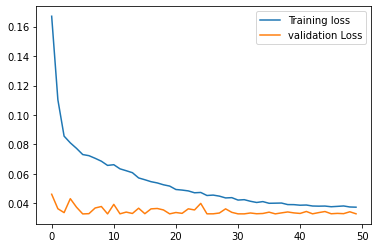

In [ ]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'validation Loss')
plt.legend()
plt.show()

In [ ]:
# make a prediction
yhat = model.predict(X_test)

In [ ]:
y_test.shape

(565, 1)

In [ ]:
forecast_copies = np.repeat(yhat, training_set.shape[1], axis=-1)
y_pred_inv = sc.inverse_transform(forecast_copies)[:,10]   

In [ ]:
forecast_copies_2 = np.repeat(y_test, training_set.shape[1], axis=-1)
y_test_inv = sc.inverse_transform(forecast_copies_2)[:,10]             

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
mae = mean_absolute_error(y_test_inv, y_pred_inv)

In [ ]:
mae

50.80602894682623

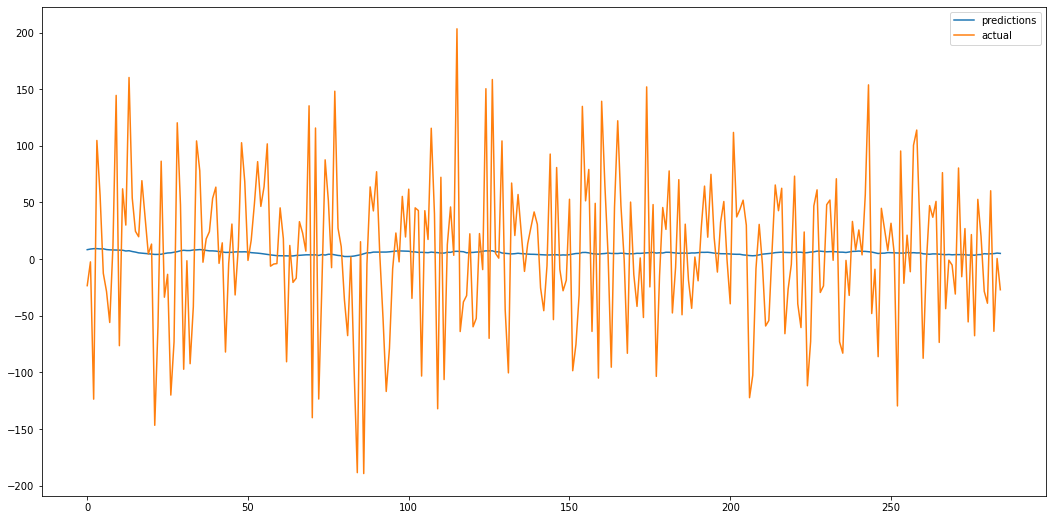

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(y_pred_inv, label = 'predictions')
plt.plot(y_test_inv, label = 'actual')
plt.legend()
plt.show()